In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
from time import sleep

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc

In [4]:
# функции связанные с океаном
from game_life import (
    prob_scaling, init_ocean, get_neighbors_coo, get_neighbors,
    is_under_over_population, step_ocean
)

# Игра «Жизнь»

## Simulating

In [5]:
# гиперпараметры

## размер океана
n, m = 50, 50

## вероятности
p_fish = 0.25
p_shrimp = 0.25
p_rock = 0.15
p_empty = 0.35

## зерно случ генератора
random_seed = 112358 # None
## шкалирование
scale = True

In [6]:
# случайная инициализация океана
ocean = init_ocean(n, m, scale, random_seed, p_empty, p_rock, p_fish, p_shrimp)
ocean

array([[2, 0, 2, ..., 1, 3, 2],
       [2, 2, 2, ..., 3, 0, 3],
       [2, 0, 1, ..., 0, 3, 0],
       ...,
       [3, 2, 3, ..., 0, 2, 0],
       [0, 1, 0, ..., 1, 3, 2],
       [2, 2, 1, ..., 3, 0, 2]])

In [7]:
# сделать ряд шагов/эпох океана
# for _ in range(10):
#     ocean = step_ocean(ocean)

#     print(ocean)
# #     sleep(0.5)

## Vizualizarion

- [Conway's Game of Life in Python](https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/)
- [Embedding Matplotlib Animations in Jupyter Notebooks](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/)

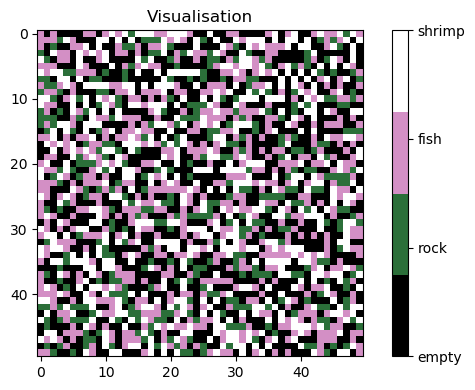

In [8]:
rc('animation', html='html5')
fig = plt.figure(dpi=100);

im = plt.imshow(ocean, cmap=plt.cm.get_cmap('cubehelix', 4), animated=True)
plt.title('Visualisation')
cbar = fig.colorbar(im, ticks=range(4))
cbar.ax.set_yticklabels(['empty', 'rock', 'fish', 'shrimp'])

def init():
    global ocean
    ocean = init_ocean(n, m, scale, random_seed, p_empty, p_rock, p_fish, p_shrimp)
    im.set_data(ocean)
    return (im,)

def animate(i):
    global ocean
    im.set_data(ocean)
    ocean = step_ocean(ocean)
    return (im,)

ani = animation.FuncAnimation(
    fig,
    animate,
    frames=50,
    init_func=init,
    interval=200,
    blit=True
)

plt.tight_layout();

In [9]:
ani

In [10]:
# Save vizualization like `.mp4`

# Set up formatting for the movie files
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

ani.save(
    './game_life.mp4',
#     writer=writer
)